<a href="https://colab.research.google.com/github/IkhlasAhmad1998/DeepLearning_Assignments/blob/main/Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/DeepLearning/flowers

/content/drive/MyDrive/DeepLearning/flowers


In [ ]:
import os
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
from pathlib import Path

In [ ]:
categories = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
# Loading Data And Defining Features And Labels
directory = Path("/content/drive/MyDrive/DeepLearning/flowers")

flowers = []
features = []
labels = []

# Iterating Over Directory To Extract Sub Directories
for dir in directory.iterdir():
  flowers.append(dir.name)
  print(dir.name)
# Iterating Over Sub Directories To Extract Lables
  for imgpath in dir.iterdir():
    if imgpath.name.endswith("jpg"):
      labels.append(dir.name)
      imgarr = cv2.imread(str(imgpath), cv2.IMREAD_GRAYSCALE)
      imgarr = cv2.resize(imgarr, (150,150))
      features.append(imgarr)

daisy
dandelion
rose
sunflower
tulip


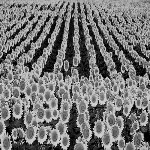

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(features[3000])

In [ ]:
features = np.array(features, dtype=np.float32)

In [ ]:
labels = np.array(labels)

In [ ]:
features.shape

(4323, 150, 150)

In [ ]:
labels.shape

(4323,)

In [ ]:
features = features.reshape((4323, 150*150))
features = features.astype('float32') / 255

In [ ]:
features[0]

array([0.53333336, 0.5647059 , 0.5764706 , ..., 0.5058824 , 0.5019608 ,
       0.5019608 ], dtype=float32)

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

labels = labelencoder.fit_transform(labels)

In [ ]:
from sklearn.model_selection import train_test_split
(train_data, test_data, train_labels, test_labels) = train_test_split(features, labels, test_size=0.3)

In [ ]:
train_data.shape

(3026, 22500)

In [ ]:
train_labels.shape

(3026,)

In [ ]:
train_labels[0:5]

array([4, 3, 1, 1, 1])

In [ ]:
test_data.shape

(1297, 22500)

In [ ]:
test_labels.shape

(1297,)

In [ ]:
train_data.shape

(3026, 22500)

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, train_labels, epochs=140, batch_size=32)

Epoch 1/140
95/95 [==============================] - 1s 6ms/step - loss: 11.9286 - accuracy: 0.2383
Epoch 2/140
95/95 [==============================] - 1s 5ms/step - loss: 3.4193 - accuracy: 0.2491
Epoch 3/140
95/95 [==============================] - 1s 5ms/step - loss: 2.1194 - accuracy: 0.3087
Epoch 4/140
95/95 [==============================] - 0s 5ms/step - loss: 1.7451 - accuracy: 0.3651
Epoch 5/140
95/95 [==============================] - 1s 5ms/step - loss: 1.5777 - accuracy: 0.3648
Epoch 6/140
95/95 [==============================] - 0s 5ms/step - loss: 1.6304 - accuracy: 0.3772
Epoch 7/140
95/95 [==============================] - 0s 5ms/step - loss: 1.4092 - accuracy: 0.4258
Epoch 8/140
95/95 [==============================] - 0s 5ms/step - loss: 1.4406 - accuracy: 0.4206
Epoch 9/140
95/95 [==============================] - 0s 5ms/step - loss: 1.2796 - accuracy: 0.4910
Epoch 10/140
95/95 [==============================] - 1s 5ms/step - loss: 1.2870 - accuracy: 0.4860
Epoch 11

In [ ]:
model.evaluate(test_data, test_labels)

41/41 [==============================] - 0s 3ms/step - loss: 3.8949 - accuracy: 0.2992


[3.894895553588867, 0.2991518974304199]